<a href="https://colab.research.google.com/github/Bharath26214/IntelChallenge/blob/main/Data_Visulaization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Content/unnati_phase1_data_revised.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21325 entries, 0 to 21324
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Alert    21325 non-null  object 
 1   Date     21325 non-null  object 
 2   Time     21325 non-null  object 
 3   Lat      21325 non-null  float64
 4   Long     21325 non-null  float64
 5   Vehicle  21325 non-null  int64  
 6   Speed    21325 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ MB


In [ ]:
c=0
for i in df.Speed:
  if i==0:
    c+=1
c

982

In [ ]:
max(df.Speed)

65

In [ ]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [ ]:
del df['Date']
del df['Time']


In [ ]:
df.datetime.dt.date.unique()

array([datetime.date(2022, 6, 1), datetime.date(2022, 6, 2),
       datetime.date(2022, 6, 3), datetime.date(2022, 6, 4),
       datetime.date(2022, 6, 6), datetime.date(2022, 6, 7),
       datetime.date(2022, 6, 8), datetime.date(2022, 6, 9),
       datetime.date(2022, 6, 10), datetime.date(2022, 6, 11),
       datetime.date(2022, 6, 13), datetime.date(2022, 6, 14),
       datetime.date(2022, 6, 15), datetime.date(2022, 6, 16),
       datetime.date(2022, 6, 17), datetime.date(2022, 6, 20),
       datetime.date(2022, 6, 21), datetime.date(2022, 6, 22),
       datetime.date(2022, 6, 23), datetime.date(2022, 6, 24),
       datetime.date(2022, 6, 25), datetime.date(2022, 6, 27),
       datetime.date(2022, 6, 28), datetime.date(2022, 6, 29),
       datetime.date(2022, 6, 30), datetime.date(2022, 7, 1),
       datetime.date(2022, 8, 2), datetime.date(2022, 8, 3),
       datetime.date(2022, 8, 4), datetime.date(2022, 8, 5),
       datetime.date(2022, 8, 6), datetime.date(2022, 8, 8),
       

In [ ]:
df.Long.nunique()

17031

In [ ]:
df.head()

,Alert,Lat,Long,Vehicle,Speed,datetime
0,cas_ldw,12.887403,80.083412,2846,48,2022-06-01 05:36:36
1,cas_ldw,12.892586,80.085794,2846,58,2022-06-01 05:36:47
2,cas_ldw,12.894932,80.087564,2846,57,2022-06-01 05:37:04
3,cas_ldw,12.898267,80.090062,2846,49,2022-06-01 05:37:31
4,cas_ldw,12.901594,80.092538,2846,58,2022-06-01 05:38:08


In [ ]:
df.tail()

,Alert,Lat,Long,Vehicle,Speed,datetime
21320,cas_pcw,13.070668,80.265539,5339,30,2022-08-31 18:12:29
21321,cas_pcw,13.071554,80.264616,5339,34,2022-08-31 18:13:01
21322,cas_hmw,13.071181,80.258729,5339,24,2022-08-31 18:15:05
21323,cas_pcw,13.067723,80.255065,5339,23,2022-08-31 18:16:35
21324,cas_hmw,13.065917,80.247777,5339,22,2022-08-31 18:19:23


In [ ]:
df.datetime.unique()

array(['2022-06-01T05:36:36.000000000', '2022-06-01T05:36:47.000000000',
       '2022-06-01T05:37:04.000000000', ...,
       '2022-08-31T18:15:05.000000000', '2022-08-31T18:16:35.000000000',
       '2022-08-31T18:19:23.000000000'], dtype='datetime64[ns]')

In [ ]:
frequency_distribution_Alerts = df['Alert'].value_counts()

In [ ]:
frequency_distribution_Alerts

cas_hmw    12328
cas_ldw     6431
cas_pcw     1976
cas_fcw      590
Name: Alert, dtype: int64

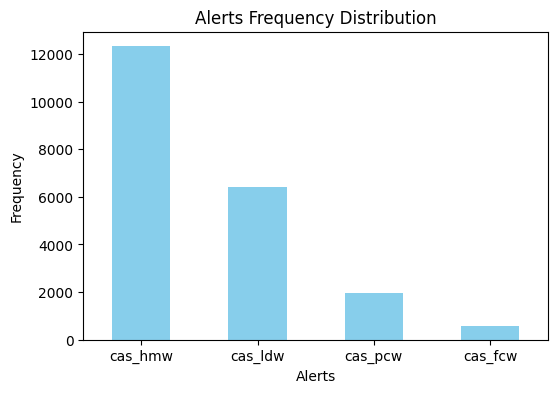

In [ ]:
plt.figure(figsize=(6, 4))
frequency_distribution_Alerts.plot(kind='bar', color='skyblue')
plt.title('Alerts Frequency Distribution')
plt.xlabel('Alerts')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotates x-axis labels for better readability
plt.show()

In [ ]:
frequency_distribution_vehicles = df['Vehicle'].value_counts()
frequency_distribution_vehicles

805     6875
5339    5842
2846    5686
3143    2904
1995      18
Name: Vehicle, dtype: int64

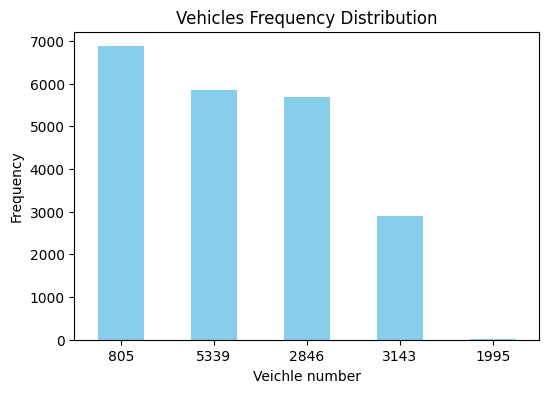

In [ ]:
plt.figure(figsize=(6, 4))
frequency_distribution_vehicles.plot(kind='bar', color='skyblue')
plt.title('Vehicles Frequency Distribution')
plt.xlabel('Veichle number')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
grouped = df.groupby('Alert')


In [ ]:
for name, group_df in grouped:
    print(f'Group Name: {name}')
    print(group_df)
    print('\n')

Group Name: cas_fcw
         Alert        Lat       Long  Vehicle  Speed            datetime
58     cas_fcw  12.724588  79.982251      805     33 2022-06-01 06:26:32
79     cas_fcw  13.061608  80.254414     2846     26 2022-06-01 06:34:09
80     cas_fcw  13.061608  80.254414     2846     26 2022-06-01 06:34:11
94     cas_fcw  12.630791  79.931575      805     58 2022-06-01 06:41:35
342    cas_fcw  12.747127  79.995694      805     58 2022-06-01 17:01:28
...        ...        ...        ...      ...    ...                 ...
21211  cas_fcw  12.922392  80.140597     3143     17 2022-08-31 08:18:59
21228  cas_fcw  12.909057  80.098864     3143     21 2022-08-31 08:29:06
21237  cas_fcw  12.882956  80.081853     3143     40 2022-08-31 08:36:09
21245  cas_fcw  12.905700  80.095599     5339     49 2022-08-31 16:39:58
21292  cas_fcw  13.006577  80.253451     5339     37 2022-08-31 17:31:04

[590 rows x 6 columns]


Group Name: cas_hmw
         Alert        Lat       Long  Vehicle  Speed      

In [ ]:
for name,group_df in grouped:
  print(f'Group Name: {name}')
  print(group_df['Speed'].mode().round(2))

Group Name: cas_fcw
0    58
Name: Speed, dtype: int64
Group Name: cas_hmw
0    0
Name: Speed, dtype: int64
Group Name: cas_ldw
0    58
Name: Speed, dtype: int64
Group Name: cas_pcw
0    0
Name: Speed, dtype: int64


CLASS PCW

```
# This is formatted as code
```



In [ ]:
df_pcw=grouped.get_group('cas_pcw')

In [ ]:
frequency_distribution_dates_pcw = df_pcw['datetime'].dt.date.value_counts()

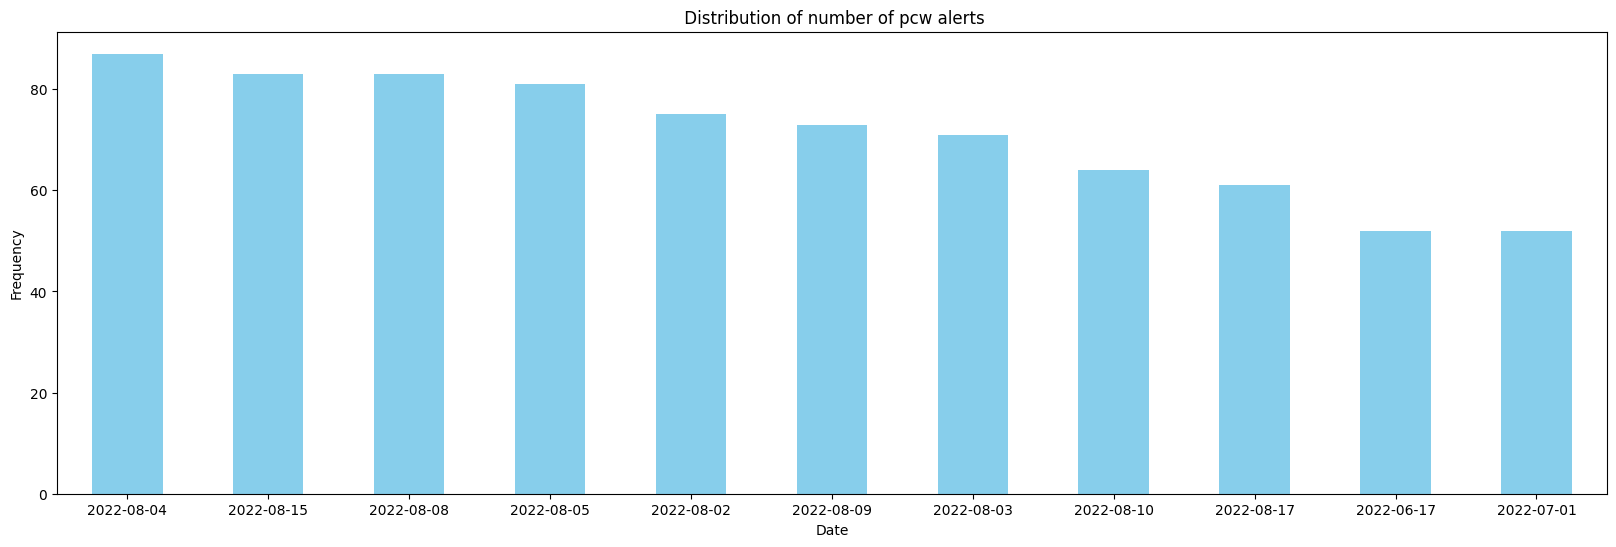

In [ ]:
plt.figure(figsize=(20, 6))
frequency_distribution_dates_pcw[:11].plot(kind='bar', color='skyblue')
plt.title(' Distribution of number of pcw alerts')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from PIL import Image
from io import BytesIO
from IPython.display import display

import requests

In [ ]:
df_pcw.shape

(1976, 6)

In [ ]:
# fig = px.scatter_mapbox(data_frame=df_pcw, lat='Lat', lon='Long', text='Alert',
#                         hover_name='Alert', hover_data=['Lat', 'Long'],
#                         zoom=3)

# fig.update_layout(mapbox_style='open-street-map')
# fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})

# fig.show()

FOR FCW


In [ ]:
df_fcw=grouped.get_group('cas_fcw')

In [ ]:
df_fcw.shape

(590, 6)

In [ ]:
# fig = px.scatter_mapbox(data_frame=df_fcw, lat='Lat', lon='Long', text='Alert',
#                         hover_name='Alert', hover_data=['Lat', 'Long'],
#                         zoom=3)

# fig.update_layout(mapbox_style='open-street-map')
# fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})

# fig.show()

Dates vs Alerts using location

In [ ]:
# fig = px.scatter_mapbox(data_frame=df_fcw, lat='Lat', lon='Long', text='Alert',
#                         hover_name='Alert', hover_data=['Lat', 'Long', 'Date'],
#                         zoom=3, color='Date')

In [ ]:
group_1=df.groupby('Alert')

In [ ]:
df_fcw=group_1.get_group('cas_fcw')

In [ ]:
df_fcw

,Alert,Lat,Long,Vehicle,Speed,datetime
58,cas_fcw,12.724588,79.982251,805,33,2022-06-01 06:26:32
79,cas_fcw,13.061608,80.254414,2846,26,2022-06-01 06:34:09
80,cas_fcw,13.061608,80.254414,2846,26,2022-06-01 06:34:11
94,cas_fcw,12.630791,79.931575,805,58,2022-06-01 06:41:35
342,cas_fcw,12.747127,79.995694,805,58,2022-06-01 17:01:28
...,...,...,...,...,...,...
21211,cas_fcw,12.922392,80.140597,3143,17,2022-08-31 08:18:59
21228,cas_fcw,12.909057,80.098864,3143,21,2022-08-31 08:29:06
21237,cas_fcw,12.882956,80.081853,3143,40,2022-08-31 08:36:09
21245,cas_fcw,12.905700,80.095599,5339,49,2022-08-31 16:39:58


FOR CLASS HMW

In [ ]:
hmw_df=grouped.get_group('cas_hmw')

In [ ]:
hmw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12328 entries, 11 to 21324
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Alert     12328 non-null  object        
 1   Lat       12328 non-null  float64       
 2   Long      12328 non-null  float64       
 3   Vehicle   12328 non-null  int64         
 4   Speed     12328 non-null  int64         
 5   datetime  12328 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 674.2+ KB


<ipython-input-141-9e63b5bdd94f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmw_df['Date'] = df['datetime'].dt.date


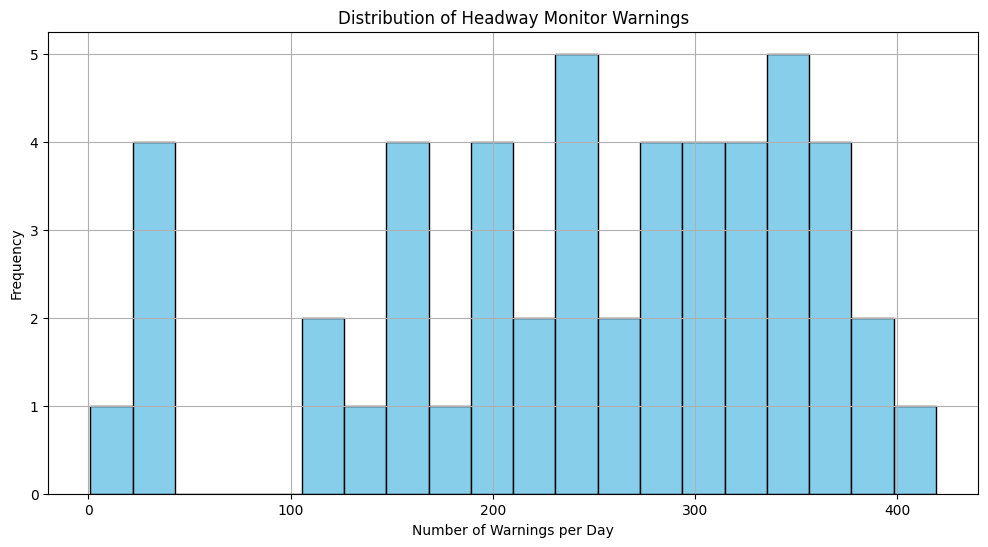

In [ ]:
hmw_df['Date'] = df['datetime'].dt.date
warning_counts = hmw_df.groupby('Date').size()

# Create a histogram to visualize the distribution
plt.figure(figsize=(12, 6))
plt.hist(warning_counts, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Warnings per Day')
plt.ylabel('Frequency')
plt.title('Distribution of Headway Monitor Warnings')
plt.grid(True)
plt.show()

<ipython-input-142-fd916df997f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmw_df['DayOfWeek'] = hmw_df['datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
<ipython-input-142-fd916df997f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmw_df['HourOfDay'] = hmw_df['datetime'].dt.hour


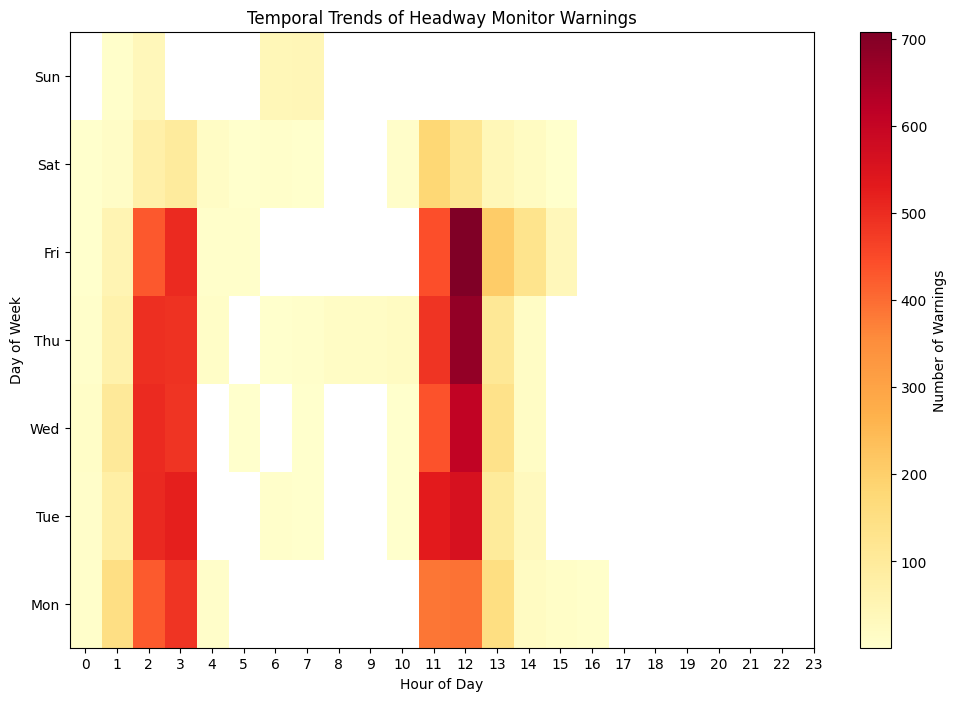

In [ ]:
# Extract date-related information
hmw_df['DayOfWeek'] = hmw_df['datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
hmw_df['HourOfDay'] = hmw_df['datetime'].dt.hour

# Create a heatmap to visualize temporal trends
warnings_by_day_hour = hmw_df.groupby(['DayOfWeek', 'HourOfDay'])['Alert'].count().unstack()

plt.figure(figsize=(12, 8))
plt.imshow(warnings_by_day_hour, cmap='YlOrRd', aspect='auto', origin='lower')
plt.colorbar(label='Number of Warnings')
plt.xticks(range(24), range(24))
plt.yticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Temporal Trends of Headway Monitor Warnings')
plt.show()

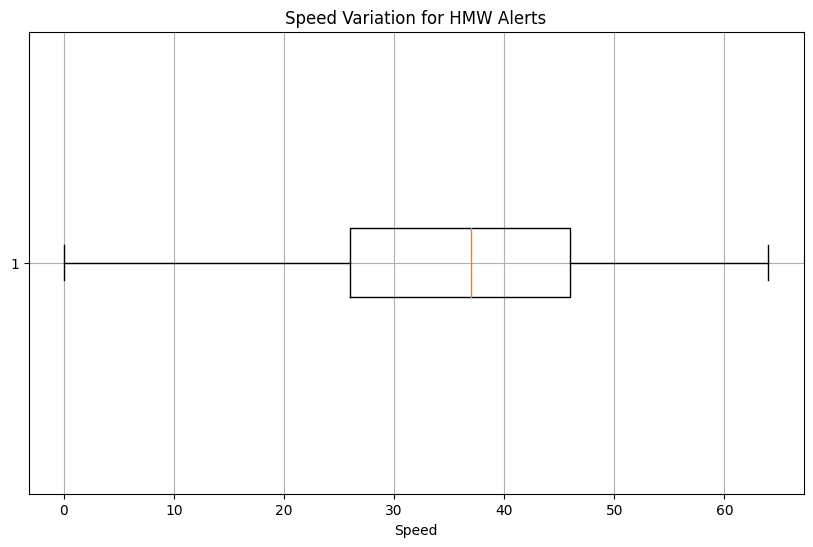

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(hmw_df['Speed'], vert=False)
plt.xlabel('Speed')
plt.title('Speed Variation for HMW Alerts')
plt.grid(True)
plt.show()

For LDW

In [ ]:

ldw_df=grouped.get_group('cas_ldw')

In [ ]:
ldw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6431 entries, 0 to 21271
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Alert     6431 non-null   object        
 1   Lat       6431 non-null   float64       
 2   Long      6431 non-null   float64       
 3   Vehicle   6431 non-null   int64         
 4   Speed     6431 non-null   int64         
 5   datetime  6431 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 351.7+ KB


<ipython-input-146-95e6251ad00e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldw_df['Date'] = ldw_df['datetime'].dt.date


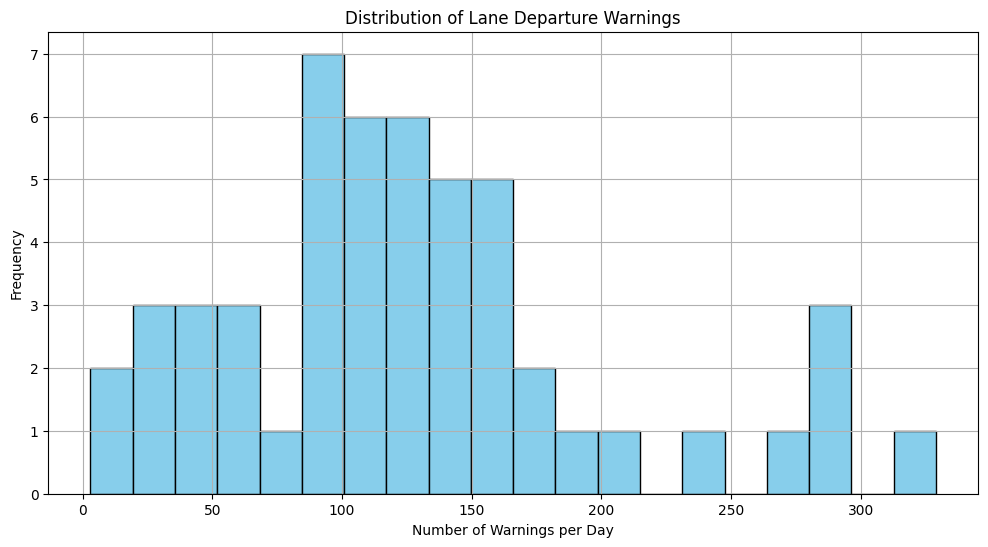

In [ ]:
ldw_df['Date'] = ldw_df['datetime'].dt.date
warning_counts = ldw_df.groupby('Date').size()

# Create a histogram to visualize the distribution
plt.figure(figsize=(12, 6))
plt.hist(warning_counts, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Warnings per Day')
plt.ylabel('Frequency')
plt.title('Distribution of Lane Departure Warnings')
plt.grid(True)
plt.show()

<ipython-input-147-dbb6681e0ef3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldw_df['DayOfWeek'] = ldw_df['datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
<ipython-input-147-dbb6681e0ef3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldw_df['HourOfDay'] = ldw_df['datetime'].dt.hour


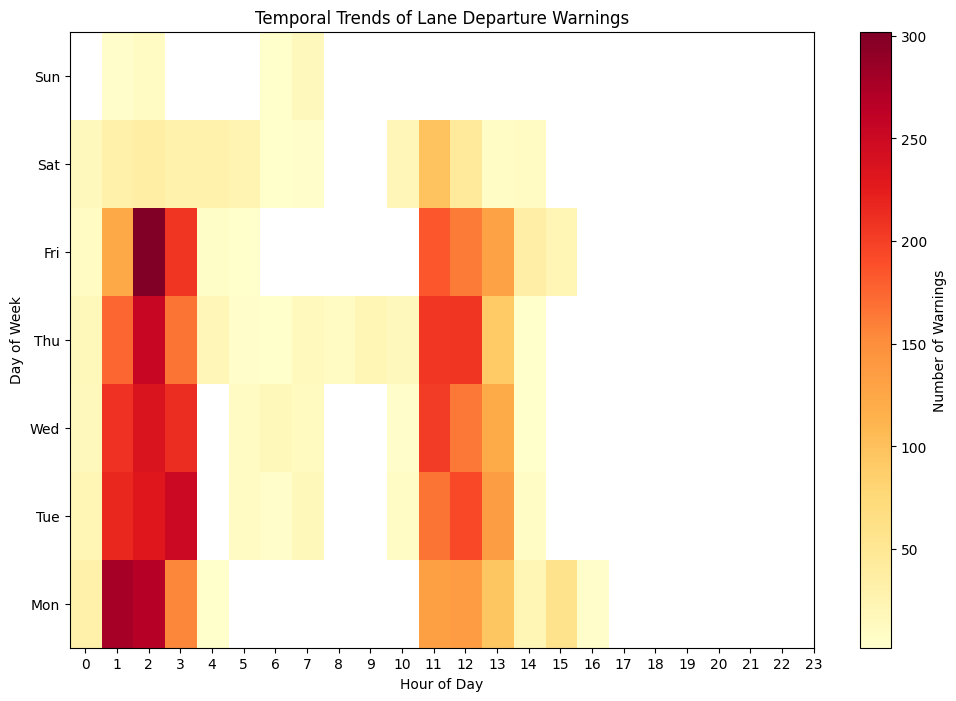

In [ ]:
ldw_df['DayOfWeek'] = ldw_df['datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
ldw_df['HourOfDay'] = ldw_df['datetime'].dt.hour
# Create a heatmap to visualize temporal trends
warnings_by_day_hour = ldw_df.groupby(['DayOfWeek', 'HourOfDay'])['Alert'].count().unstack()

plt.figure(figsize=(12, 8))
plt.imshow(warnings_by_day_hour, cmap='YlOrRd', aspect='auto', origin='lower')
plt.colorbar(label='Number of Warnings')
plt.xticks(range(24), range(24))
plt.yticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Temporal Trends of Lane Departure Warnings')
plt.show()

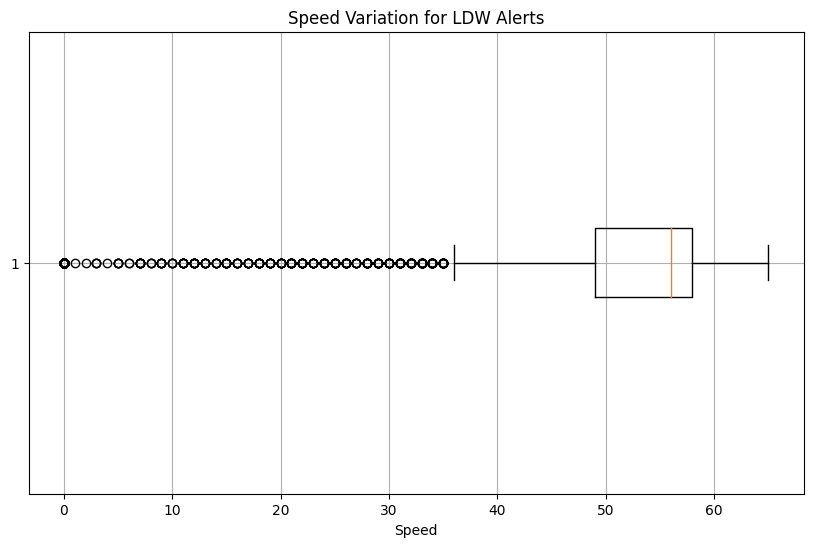

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(ldw_df['Speed'], vert=False)
plt.xlabel('Speed')
plt.title('Speed Variation for LDW Alerts')
plt.grid(True)
plt.show()

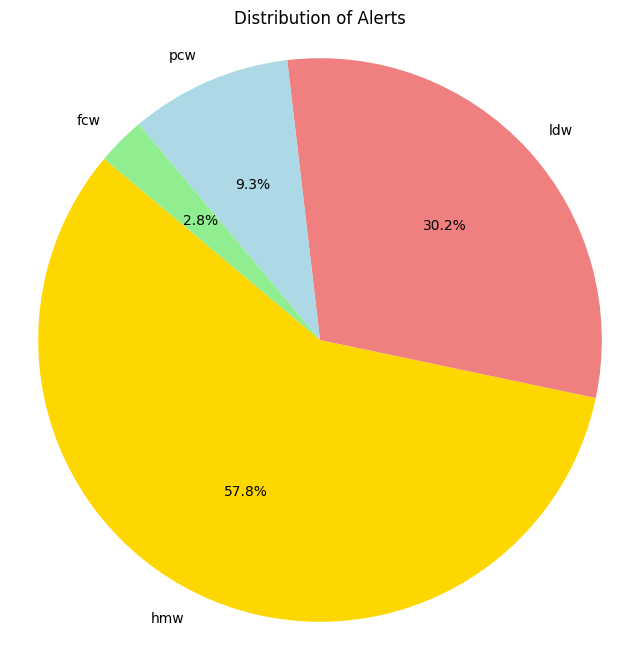

In [ ]:
# Data for the pie chart
labels = ['hmw', 'ldw', 'pcw', 'fcw']
sizes = [i for i in frequency_distribution_Alerts] # These values represent the percentages or proportions

# Colors for each category (optional)
colors = ['gold', 'lightcoral', 'lightblue', 'lightgreen']

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title (optional)
plt.title('Distribution of Alerts')

# Show the pie chart
plt.show()


In [ ]:
frequency_distribution_vehicles

805     6875
5339    5842
2846    5686
3143    2904
1995      18
Name: Vehicle, dtype: int64

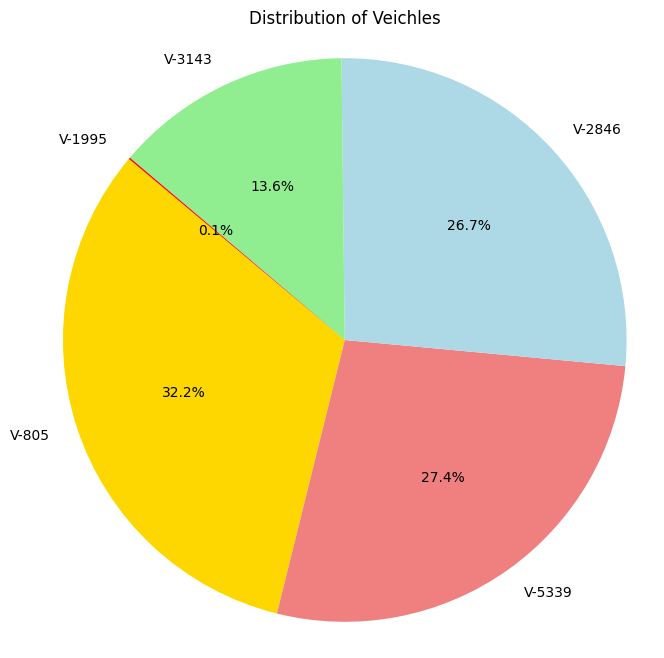

In [ ]:
labels = ['V-805', 'V-5339', 'V-2846', 'V-3143','V-1995']
sizes = [i for i in frequency_distribution_vehicles] # These values represent the percentages or proportions

# Colors for each category (optional)
colors = ['gold', 'lightcoral', 'lightblue', 'lightgreen','red']

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title (optional)
plt.title('Distribution of Veichles')

# Show the pie chart
plt.show()

In [ ]:
frequency_distribution_dates = df['datetime'].dt.date.value_counts().sort_index()

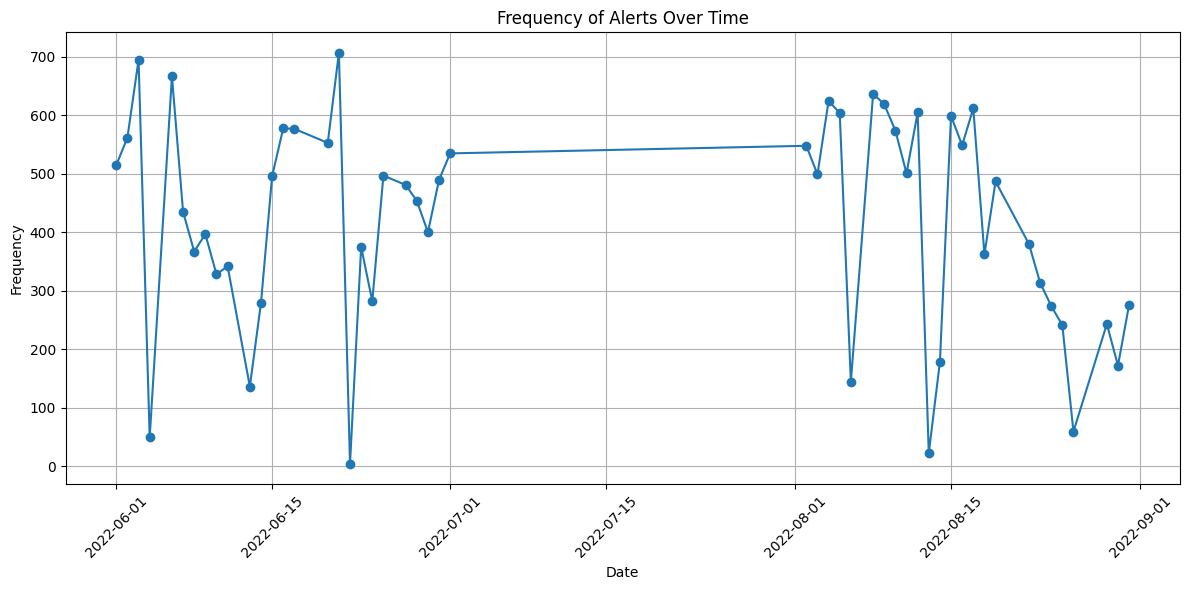

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.plot(frequency_distribution_dates.index, frequency_distribution_dates.values, marker='o', linestyle='-')

# Customize the x-axis (dates)
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Customize the y-axis (frequency)
plt.ylabel('Frequency')

# Add a title
plt.title('Frequency of Alerts Over Time')

# Show the line chart
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
frequency_distribution_dates_pcw = df_pcw['datetime'].dt.date.value_counts().sort_index()

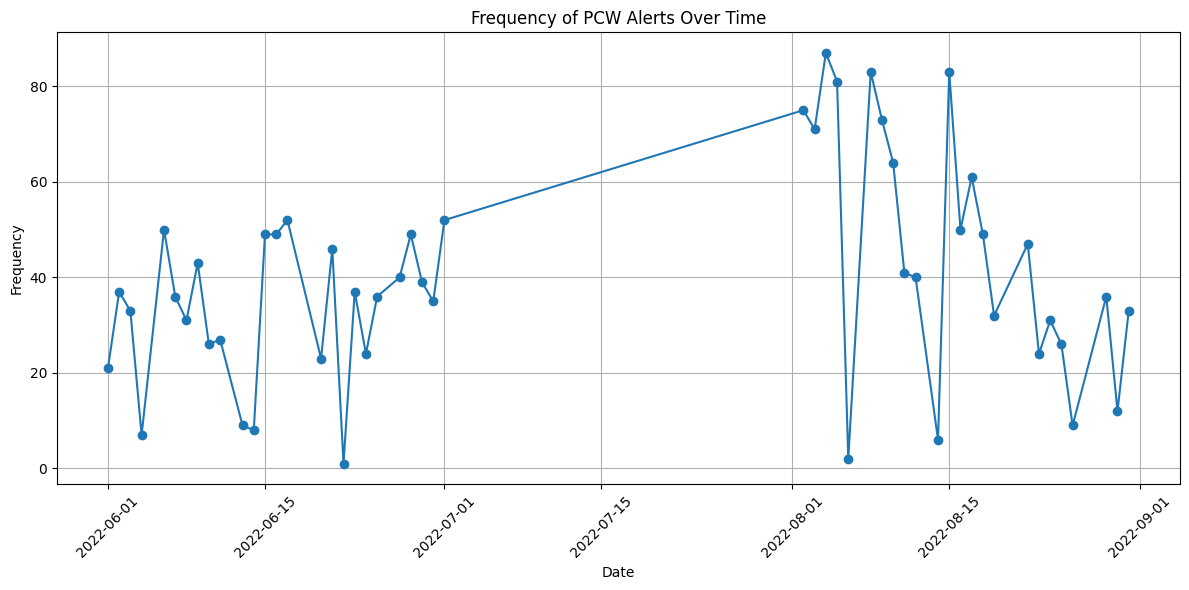

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.plot(frequency_distribution_dates_pcw.index, frequency_distribution_dates_pcw.values, marker='o', linestyle='-')

# Customize the x-axis (dates)
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Customize the y-axis (frequency)
plt.ylabel('Frequency')

# Add a title
plt.title('Frequency of PCW Alerts Over Time')

# Show the line chart
plt.grid(True)
plt.tight_layout()
plt.show()

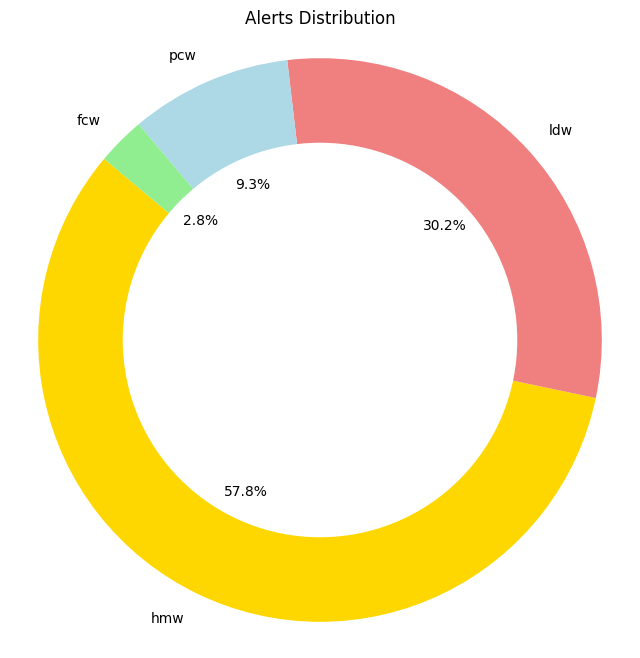

In [ ]:
labels = ['hmw', 'ldw', 'pcw', 'fcw']
sizes = [i for i in frequency_distribution_Alerts]

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Draw a white circle in the center to create the donut effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Add a title (optional)
plt.title('Alerts Distribution')

# Show the donut chart
plt.show()

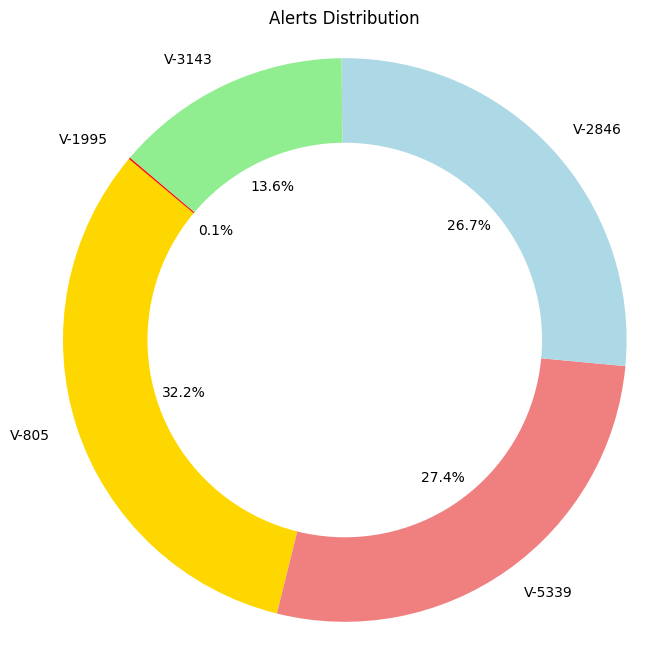

In [ ]:
labels = ['V-805', 'V-5339', 'V-2846', 'V-3143','V-1995']
sizes = [i for i in frequency_distribution_vehicles]
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Draw a white circle in the center to create the donut effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Add a title (optional)
plt.title('Alerts Distribution')

# Show the donut chart
plt.show()

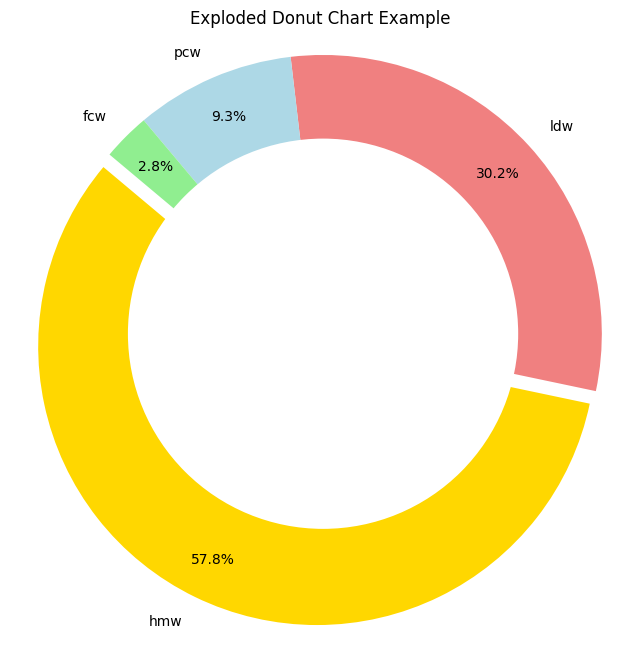

In [ ]:


labels = ['hmw', 'ldw', 'pcw', 'fcw']
sizes = [i for i in frequency_distribution_Alerts]
# Find the index of the label with the highest size
max_size_index = sizes.index(max(sizes))

# Create an 'explode' list with the highest size label exploded out
explode = [0.05 if i == max_size_index else 0 for i in range(len(labels))]

# Create the exploded donut chart
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)

# Draw a white circle in the center to create the donut effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Add a title (optional)
plt.title('Exploded Donut Chart Example')

# Show the exploded donut chart
plt.show()

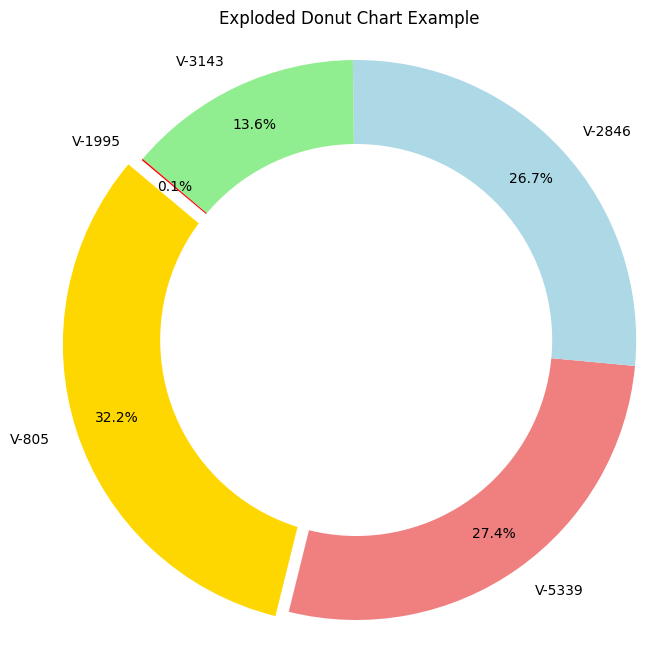

In [ ]:
labels = ['V-805', 'V-5339', 'V-2846', 'V-3143','V-1995']
sizes = [i for i in frequency_distribution_vehicles]
max_size_index = sizes.index(max(sizes))

# Create an 'explode' list with the highest size label exploded out
explode = [0.05 if i == max_size_index else 0 for i in range(len(labels))]

# Create the exploded donut chart
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)

# Draw a white circle in the center to create the donut effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Add a title (optional)
plt.title('Exploded Donut Chart Example')

# Show the exploded donut chart
plt.show()

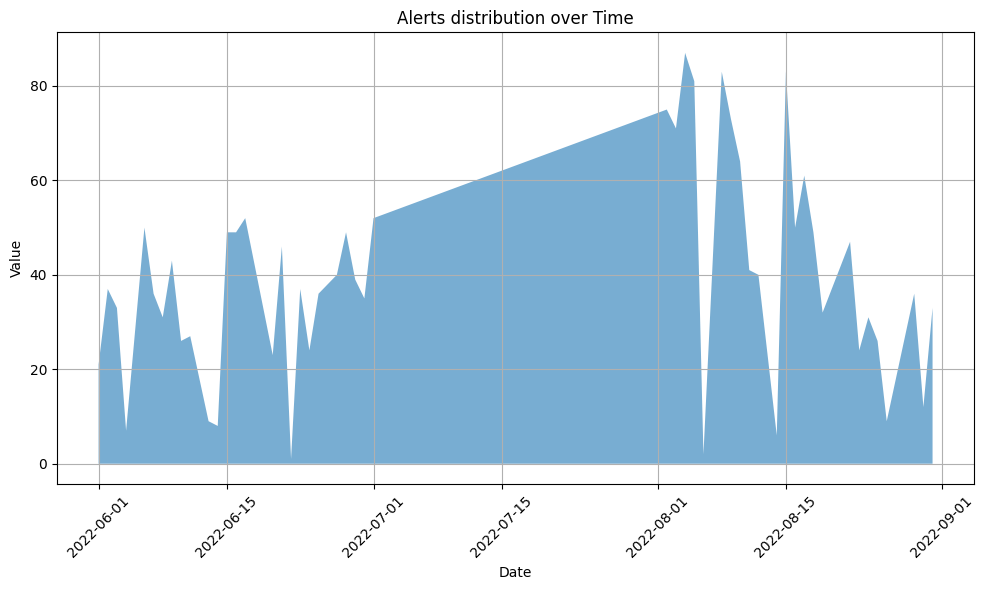

In [ ]:

dates,values=frequency_distribution_dates_pcw.index, frequency_distribution_dates_pcw.values


plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.fill_between(dates, values, alpha=0.6)

# Customize the x-axis (dates)
plt.xlabel('Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Customize the y-axis (values)
plt.ylabel('Value')

# Add a title
plt.title('Alerts distribution over Time')

# Show the area chart
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
grouped_vehicle = df.groupby('Vehicle')

In [ ]:
values1,values2,values3,values4=[],[],[],[]
for vehicle, group in grouped_vehicle:
    alert_counts = group['Alert'].value_counts().reset_index()
    alert_counts.columns = ['Alert', 'Count']
    values1.append(alert_counts['Count'][0])
    values2.append(alert_counts['Count'][1])
    values3.append(alert_counts['Count'][2])
    values4.append(alert_counts['Count'][3])


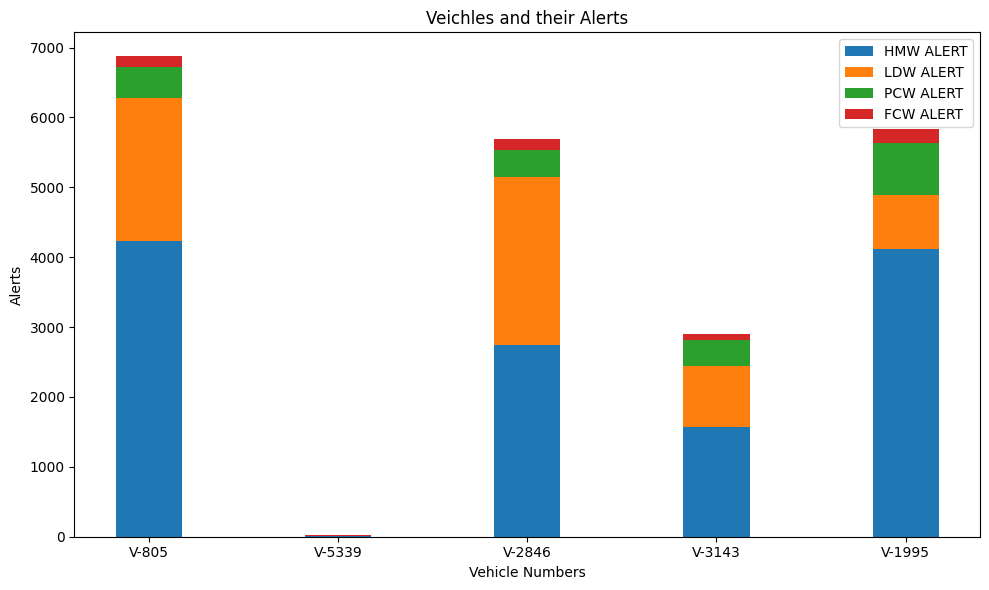

In [ ]:
categories = ['V-805', 'V-5339', 'V-2846', 'V-3143','V-1995']

# Create a figure and axis
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = plt.subplot()

# Create the stacked bar chart
width = 0.35  # Width of the bars
indices = np.arange(len(categories))

plt.bar(indices, values1, width, label='HMW ALERT')
plt.bar(indices, values2, width, label='LDW ALERT', bottom=values1)
plt.bar(indices, values3, width, label='PCW ALERT', bottom=np.add(values1, values2))
plt.bar(indices, values4, width, label='FCW ALERT', bottom=np.add(np.add(values1, values2), values3))

# Customize the chart
plt.xlabel('Vehicle Numbers')
plt.ylabel('Alerts')
plt.title('Veichles and their Alerts')
plt.xticks(indices, categories)
plt.legend()

# Show the chart
# plt.grid(True)
plt.tight_layout()
plt.show()